In [ ]:
# !pip install pandas

Data Loading and Preprocessing





In [ ]:
import pandas as pd

# Load the CSV files into dataframes
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display the first few rows of each dataframe
print("Customers Data:")
print(customers.head(), "\n")

print("Products Data:")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C012

In [ ]:
# Check for missing values in each dataset
print("Missing Values in Transactions:\n", transactions.isnull().sum(), "\n")
print("Missing Values in Products:\n", products.isnull().sum(), "\n")
print("Missing Values in Customers:\n", customers.isnull().sum())


Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [ ]:
# Check for invalid Quantity or TotalValue
invalid_transactions = transactions[
    (transactions["Quantity"] <= 0) |
    (transactions["TotalValue"] <= 0)
]
print("Invalid Transactions:\n", invalid_transactions)


Invalid Transactions:
 Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [ ]:
# Calculate IQR for Quantity and TotalValue
Q1 = transactions["TotalValue"].quantile(0.25)
Q3 = transactions["TotalValue"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = transactions[(transactions["TotalValue"] < lower_bound) | (transactions["TotalValue"] > upper_bound)]
print("Outliers in TotalValue:\n", outliers)


Outliers in TotalValue:
 Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


In [ ]:
#The Data appears almost preprocessed and clean

In [ ]:
#increasing the sensitivity to overlook extreme values
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Filter outliers
outliers = transactions[(transactions["TotalValue"] < lower_bound) | (transactions["TotalValue"] > upper_bound)]
print("Not outliers but close to it :\n", outliers)

Not outliers but close to it :
     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
509        T00499      C0065      P032  2024-07-18 02:51:22         4   
560        T00070      C0051      P017  2024-12-11 13:46:30         4   
562        T00224      C0171      P017  2024-07-06 23:53:24         4   
565        T00503      C0013      P017  2024-07-26 00:21:59         4   
566        T00558      C0169      P017  2024-11-29 23:39:00         4   
879        T00928      C0082      P075  2024-09-06 18:39:07         4   
971        T00307      C0044      P045  2024-05-30 18:15:28         4   

     TotalValue   Price  
509     1954.52  488.63  
560     1879.08  469.77  
562     1879.08  469.77  
565     1879.08  469.77  
566     1879.08  469.77  
879     1991.04  497.76  
971     1927.12  481.78  


In [ ]:
customers.describe()


,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [ ]:
products.describe()
products['Category'].value_counts()  # Distribution of products by category


,count
Category,
Books,26
Electronics,26
Clothing,25
Home Decor,23


In [ ]:
transactions.describe()
transactions.groupby('ProductID').size()  # Most frequent products sold
transactions.groupby('CustomerID').size()  # Most active customers


,0
CustomerID,
C0001,5
C0002,4
C0003,4
C0004,8
C0005,3
...,...
C0196,4
C0197,3
C0198,2


# User Engagement

<Axes: title={'center': 'Signup Trends Over Time'}, xlabel='SignupMonth'>

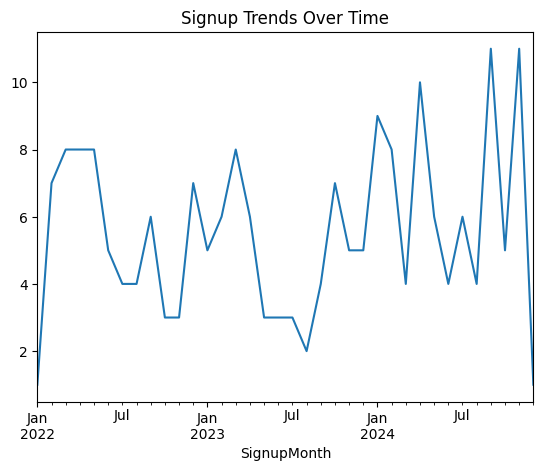

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth').size()
signup_trends.plot(kind='line', title='Signup Trends Over Time')


In [ ]:
# Find the latest signup date
latest_signup_date = customers['SignupDate'].max()

print(f"The latest signup date is: {latest_signup_date}")


The latest signup date is: 2024-12-28 00:00:00


In [ ]:
# Filter SignupMonth for the entire period from Jan to Dec
start_date_2024 = pd.to_datetime('2024-01-01')
end_date_2024 = pd.to_datetime('2024-12-31')

signup_trends_2024 = signup_trends[(signup_trends.index.to_timestamp() >= start_date_2024) & (signup_trends.index.to_timestamp() <= end_date_2024)]

# Filter for the same period in 2023
start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-12-31')

signup_trends_2023 = signup_trends[(signup_trends.index.to_timestamp() >= start_date_2023) & (signup_trends.index.to_timestamp() <= end_date_2023)]

# Filter for the same period in 2022
start_date_2022 = pd.to_datetime('2022-01-01')
end_date_2022 = pd.to_datetime('2022-12-31')

signup_trends_2022 = signup_trends[(signup_trends.index.to_timestamp() >= start_date_2022) & (signup_trends.index.to_timestamp() <= end_date_2022)]

# Now calculate month-wise growth from Jan to Dec for 2024, 2023, and 2022
monthly_growth_percent = []


In [ ]:
total_growth_vs_2023 = 0
total_growth_vs_2022 = 0

for month in range(1, 13):  # Looping from Jan (1) to Dec (12)
    current_month_2024 = f'2024-{month:02d}'
    current_month_2023 = f'2023-{month:02d}'
    current_month_2022 = f'2022-{month:02d}'

    current_month_signups_2024 = signup_trends_2024.get(current_month_2024, 0)
    current_month_signups_2023 = signup_trends_2023.get(current_month_2023, 0)
    current_month_signups_2022 = signup_trends_2022.get(current_month_2022, 0)

    # Calculate growth percentage for 2024 compared to 2023 and 2022
    if current_month_signups_2023 > 0:
        growth_2023 = ((current_month_signups_2024 - current_month_signups_2023) / current_month_signups_2023) * 100
    else:
        growth_2023 = 0  # If no signups in 2023, consider no growth

    if current_month_signups_2022 > 0:
        growth_2022 = ((current_month_signups_2024 - current_month_signups_2022) / current_month_signups_2022) * 100
    else:
        growth_2022 = 0  # If no signups in 2022, consider no growth

    # Add the monthly growth to the list and accumulate for yearly totals
    monthly_growth_percent.append((current_month_2024, growth_2023, growth_2022))
    total_growth_vs_2023 += growth_2023
    total_growth_vs_2022 += growth_2022

# Displaying the results for all months from Jan to Dec
print("Month | Growth vs 2023 (%) | Growth vs 2022 (%)")
for month_2024, growth_2023, growth_2022 in monthly_growth_percent:
    print(f"{month_2024} | {growth_2023:.2f}% | {growth_2022:.2f}%")

# Calculate overall growth for the entire year
yearly_growth_vs_2023 = total_growth_vs_2023 / 12  # Averaging the growth over the months
yearly_growth_vs_2022 = total_growth_vs_2022 / 12  # Averaging the growth over the months

# Display the yearly growth summary
print("\nYearly Growth Summary:")
print(f"Yearly growth compared to 2023: {yearly_growth_vs_2023:.2f}%")
print(f"Yearly growth compared to 2022: {yearly_growth_vs_2022:.2f}%")

Month | Growth vs 2023 (%) | Growth vs 2022 (%)
2024-01 | 80.00% | 800.00%
2024-02 | 33.33% | 14.29%
2024-03 | -50.00% | -50.00%
2024-04 | 66.67% | 25.00%
2024-05 | 100.00% | -25.00%
2024-06 | 33.33% | -20.00%
2024-07 | 100.00% | 50.00%
2024-08 | 100.00% | 0.00%
2024-09 | 175.00% | 83.33%
2024-10 | -28.57% | 66.67%
2024-11 | 120.00% | 266.67%
2024-12 | -80.00% | -85.71%

Yearly Growth Summary:
Yearly growth compared to 2023: 54.15%
Yearly growth compared to 2022: 93.77%


Yearly Growth Summary:
Yearly growth compared to 2023: 54.15%
Yearly growth compared to 2022: 93.77%

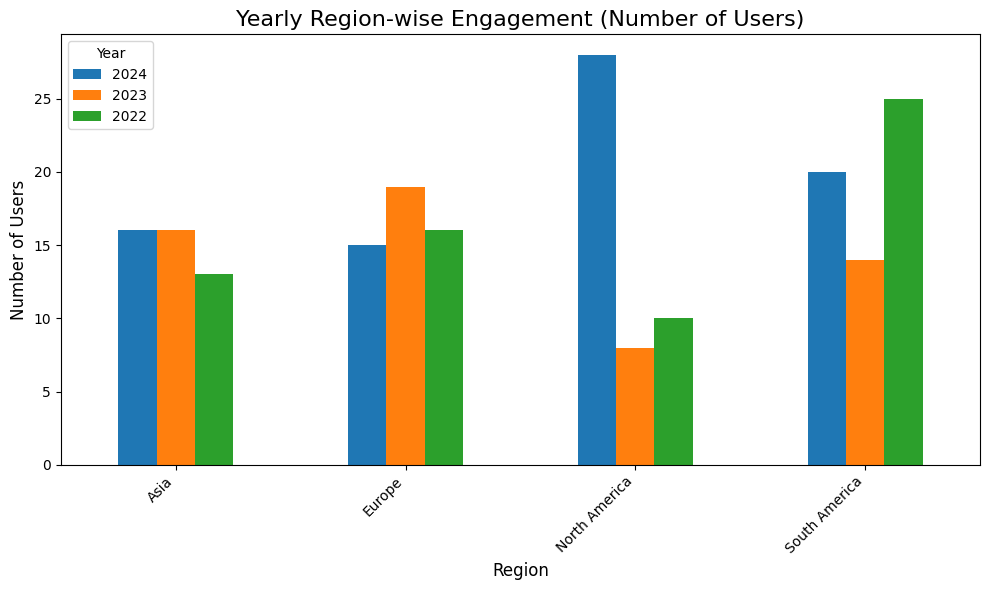

In [ ]:
import matplotlib.pyplot as plt

# Group the data by Region and year (2024, 2023, 2022)
region_signup_trends_2024 = customers[customers['SignupMonth'].dt.year == 2024].groupby(['Region']).size()
region_signup_trends_2023 = customers[customers['SignupMonth'].dt.year == 2023].groupby(['Region']).size()
region_signup_trends_2022 = customers[customers['SignupMonth'].dt.year == 2022].groupby(['Region']).size()

# Combine the data into a single DataFrame
region_summary_df = pd.DataFrame({
    '2024': region_signup_trends_2024,
    '2023': region_signup_trends_2023,
    '2022': region_signup_trends_2022
}).fillna(0)  # Replace NaN with 0 if no signups exist for the region

# Plotting the data
region_summary_df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Yearly Region-wise Engagement (Number of Users)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Year", loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


All About Products

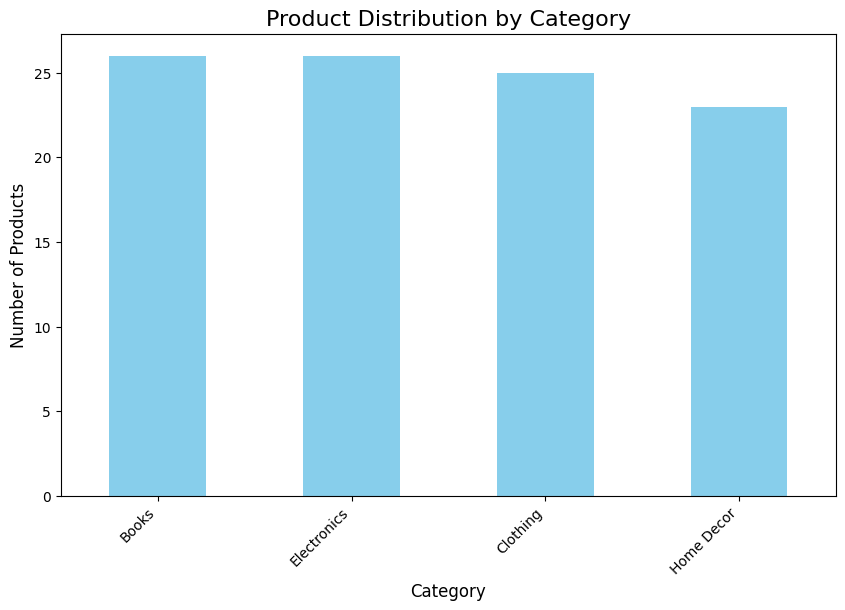

In [ ]:
# Count the number of products in each category
category_counts = products['Category'].value_counts()

# Plot a bar chart for the category distribution
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Product Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


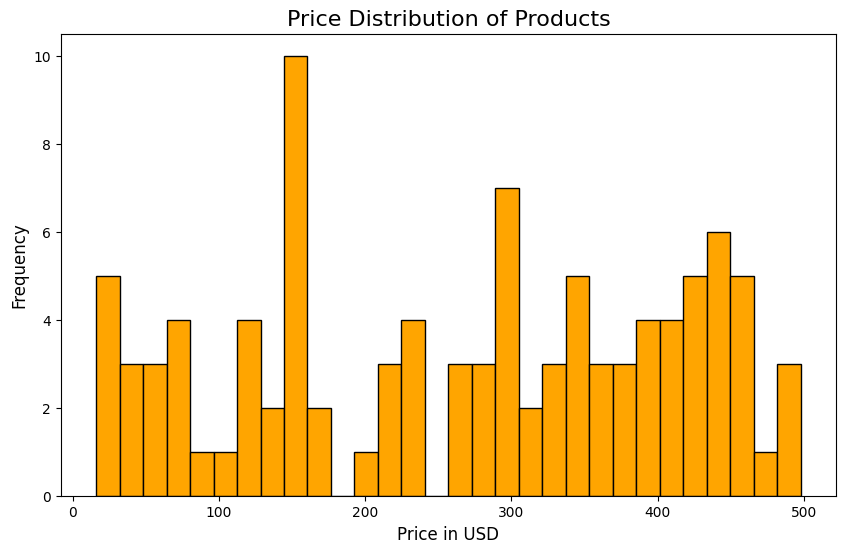

In [ ]:
# Plot the price distribution
products['Price'].plot(kind='hist', bins=30, figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Price Distribution of Products', fontsize=16)
plt.xlabel('Price in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


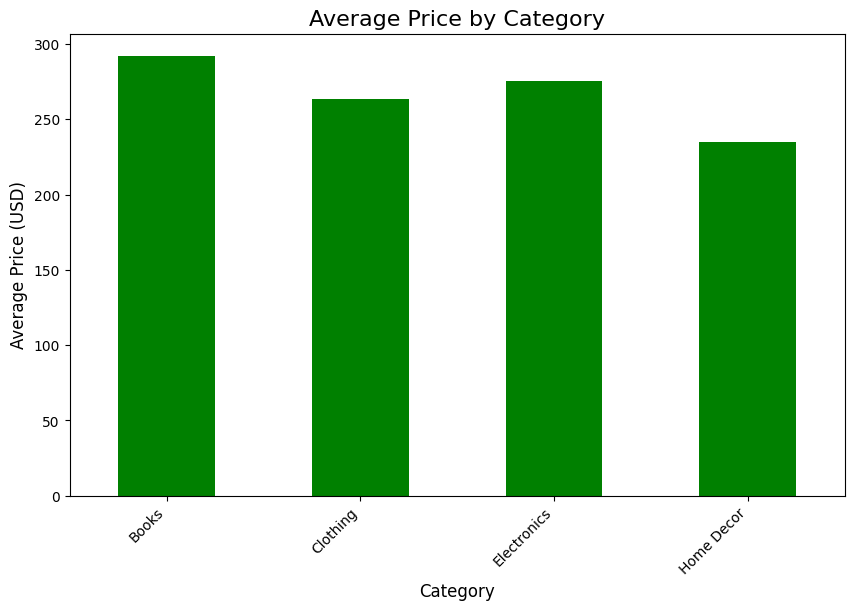

In [ ]:
# Calculate the average price by category
average_price_by_category = products.groupby('Category')['Price'].mean()

# Plot the average price by category
average_price_by_category.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


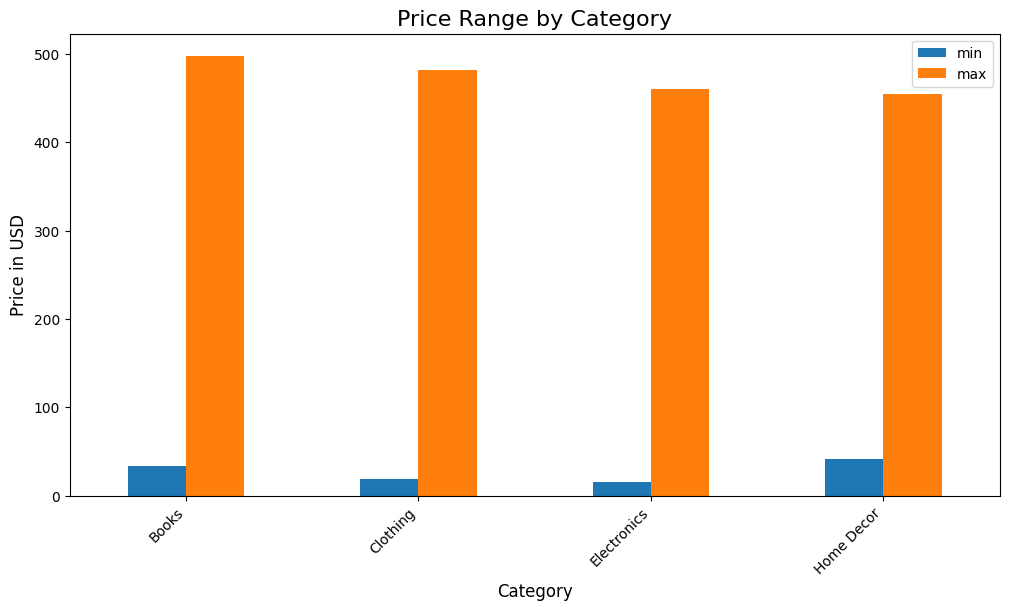

In [ ]:
# Calculate the price range (min, max) by category
price_range_by_category = products.groupby('Category')['Price'].agg(['min', 'max'])

# Plot the price range by category
price_range_by_category.plot(kind='bar', figsize=(12, 6))
plt.title('Price Range by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Top 10 products by price
top_10_expensive = products.nlargest(10, 'Price')

# Bottom 10 products by price
bottom_10_cheap = products.nsmallest(10, 'Price')

print("Top 10 Expensive Products:\n", top_10_expensive[['ProductName', 'Price']])
print("\nBottom 10 Cheap Products:\n", bottom_10_cheap[['ProductName', 'Price']])


Top 10 Expensive Products:
                  ProductName   Price
74          TechPro Textbook  497.76
31        BookWorld Cookbook  488.63
44         SoundWave T-Shirt  481.78
16       ActiveWear Textbook  469.77
36      SoundWave Smartwatch  459.86
40  ComfortLiving Smartphone  456.28
82     ActiveWear Smartwatch  455.72
22   ActiveWear Cookware Set  454.53
63   HomeSense Running Shoes  452.42
93    HomeSense Cookware Set  447.34

Bottom 10 Cheap Products:
                  ProductName  Price
55      SoundWave Smartwatch  16.08
43  ActiveWear Running Shoes  18.82
13         ActiveWear Jacket  26.26
72      ComfortLiving Laptop  26.99
34        ActiveWear T-Shirt  30.59
62             TechPro Novel  33.59
77             HomeSense Rug  41.18
2    ComfortLiving Biography  44.12
69         HomeSense T-Shirt  48.69
81         ComfortLiving Rug  55.99


In [ ]:
# Find the min and max price for each category
min_max_prices = products.groupby('Category')['Price'].agg(['min', 'max']).sort_index()

# Find the top 10 most expensive products per category
top_10_expensive_per_category = products.sort_values('Price', ascending=False).groupby('Category').head(10).sort_values('Category')

# Find the least 10 expensive products per category
least_10_expensive_per_category = products.sort_values('Price', ascending=True).groupby('Category').head(10).sort_values('Category')

# Print the minimum and maximum prices for each category
print("Minimum and Maximum Prices by Category:")
print(min_max_prices)

# Print the top 10 most expensive products in each category, sorted by category
print("\nTop 10 Most Expensive Products by Category:")
print(top_10_expensive_per_category[['Category', 'ProductName', 'Price']])

# Print the least 10 expensive products in each category, sorted by category
print("\nLeast 10 Expensive Products by Category:")
print(least_10_expensive_per_category[['Category', 'ProductName', 'Price']])


Minimum and Maximum Prices by Category:
               min     max
Category                  
Books        33.59  497.76
Clothing     18.82  481.78
Electronics  16.08  459.86
Home Decor   41.18  454.53

Top 10 Most Expensive Products by Category:
       Category                 ProductName   Price
74        Books            TechPro Textbook  497.76
42        Books             SoundWave Novel  404.40
84        Books         BookWorld Biography  416.35
47        Books            TechPro Cookbook  416.40
17        Books  ComfortLiving Mystery Book  436.89
85        Books             SoundWave Novel  440.70
67        Books               TechPro Novel  447.23
6         Books          SoundWave Cookbook  420.15
31        Books          BookWorld Cookbook  488.63
16        Books         ActiveWear Textbook  469.77
45     Clothing           BookWorld Sweater  366.07
35     Clothing            BookWorld Jacket  372.55
18     Clothing       ComfortLiving Sweater  385.37
91     Clothing     BookW

Summing up Transactions

In [ ]:
# Basic overview of the dataset
print(transactions.info())
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


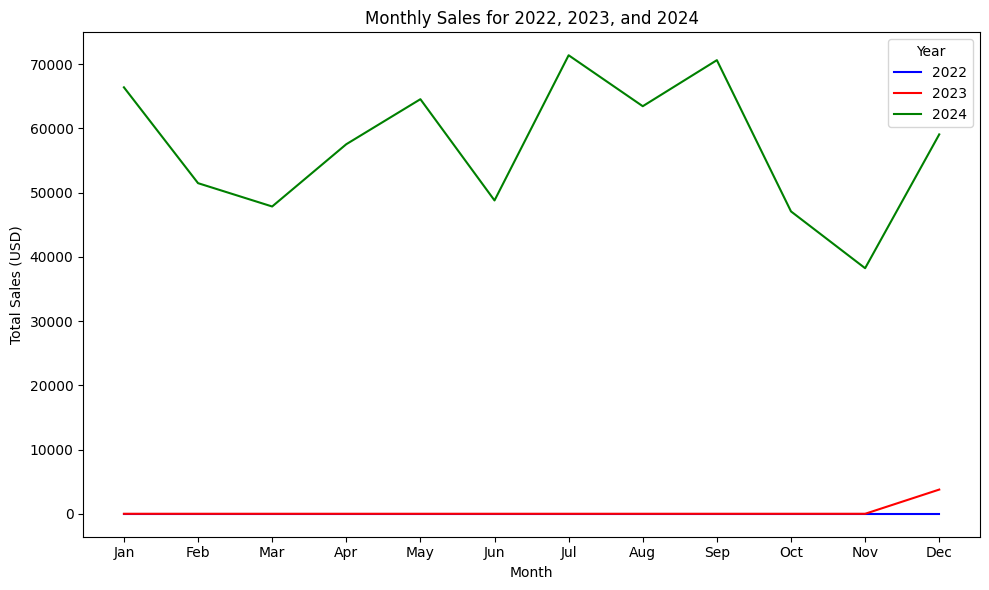

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'TransactionDate' is in datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract the month from the 'TransactionDate'
transactions['Month'] = transactions['TransactionDate'].dt.month

# Filter for the years 2022, 2023, and 2024
transactions_2022 = transactions[transactions['TransactionDate'].dt.year == 2022]
transactions_2023 = transactions[transactions['TransactionDate'].dt.year == 2023]
transactions_2024 = transactions[transactions['TransactionDate'].dt.year == 2024]

# Group by 'Month' and sum the 'TotalValue' (sales) for each month
monthly_sales_2022 = transactions_2022.groupby('Month')['TotalValue'].sum()
monthly_sales_2023 = transactions_2023.groupby('Month')['TotalValue'].sum()
monthly_sales_2024 = transactions_2024.groupby('Month')['TotalValue'].sum()

# Ensure that all months from 1 to 12 are included (even if no sales for some months)
monthly_sales_2022 = monthly_sales_2022.reindex(range(1, 13), fill_value=0)
monthly_sales_2023 = monthly_sales_2023.reindex(range(1, 13), fill_value=0)
monthly_sales_2024 = monthly_sales_2024.reindex(range(1, 13), fill_value=0)

# Plot monthly sales for 2022, 2023, and 2024
plt.figure(figsize=(10, 6))

# Plot the sales data for each year with different colors
plt.plot(monthly_sales_2022.index, monthly_sales_2022.values, label='2022', color='blue')
plt.plot(monthly_sales_2023.index, monthly_sales_2023.values, label='2023', color='red')
plt.plot(monthly_sales_2024.index, monthly_sales_2024.values, label='2024', color='green')

# Add labels and title
plt.title('Monthly Sales for 2022, 2023, and 2024')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()


2023 data is only last two days of dec

In [ ]:
# Filter transactions for the year 2023
transactions_2023 = transactions[transactions['TransactionDate'].dt.year == 2023]

# Display the filtered data
print(transactions_2023)


    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
32         T00605      C0017      P057 2023-12-31 03:27:43         4   
225        T00869      C0081      P061 2023-12-30 15:29:12         2   
729        T00845      C0154      P083 2023-12-31 15:44:04         2   
822        T00154      C0040      P020 2023-12-31 06:53:54         4   

     TotalValue   Price  Month  
32       958.80  239.70     12  
225      313.92  156.96     12  
729      911.44  455.72     12  
822     1585.36  396.34     12  


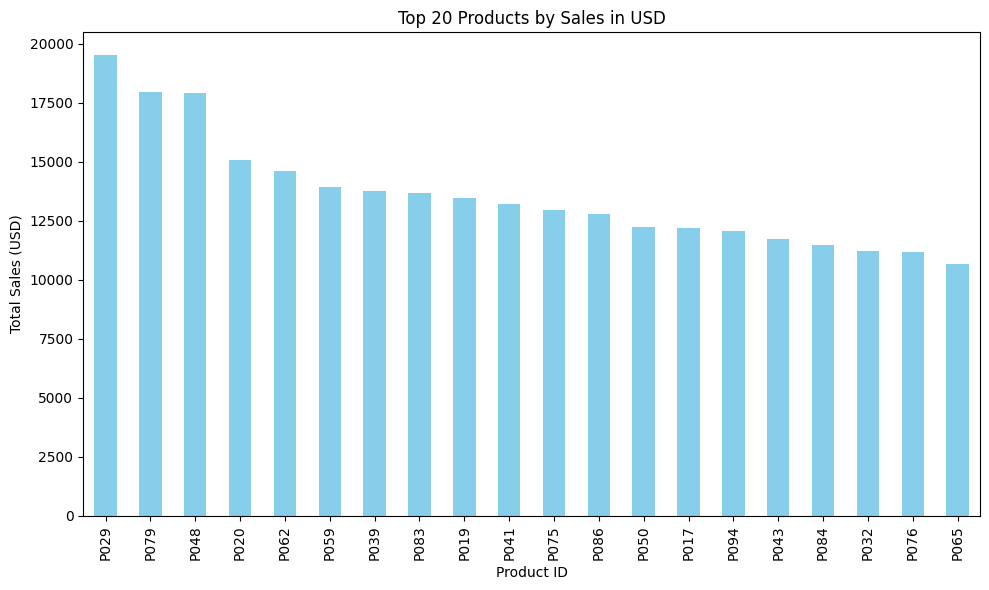

In [ ]:
import matplotlib.pyplot as plt

# Group the transactions by ProductID and calculate the total sales (TotalValue) per product
product_sales = transactions.groupby('ProductID')['TotalValue'].sum()

# Sort the products by total sales in descending order
top_20_products = product_sales.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(10,6))
top_20_products.plot(kind='bar', color='skyblue')
plt.title('Top 20 Products by Sales in USD')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


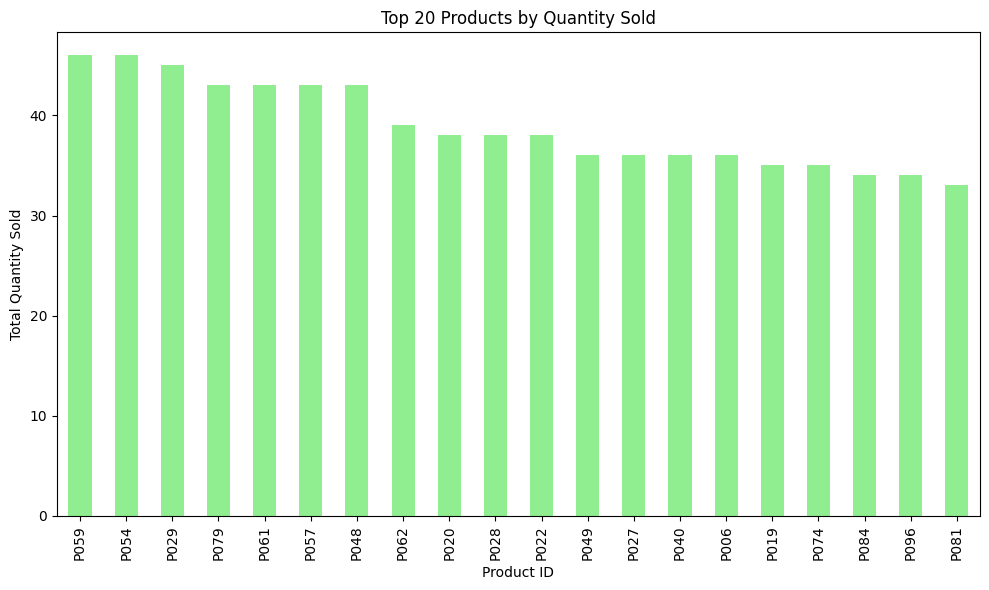

In [ ]:
import matplotlib.pyplot as plt

# Group the transactions by ProductID and calculate the total quantity sold per product
product_quantity = transactions.groupby('ProductID')['Quantity'].sum()

# Sort the products by total quantity sold in descending order
top_20_quantity_products = product_quantity.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(10,6))
top_20_quantity_products.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


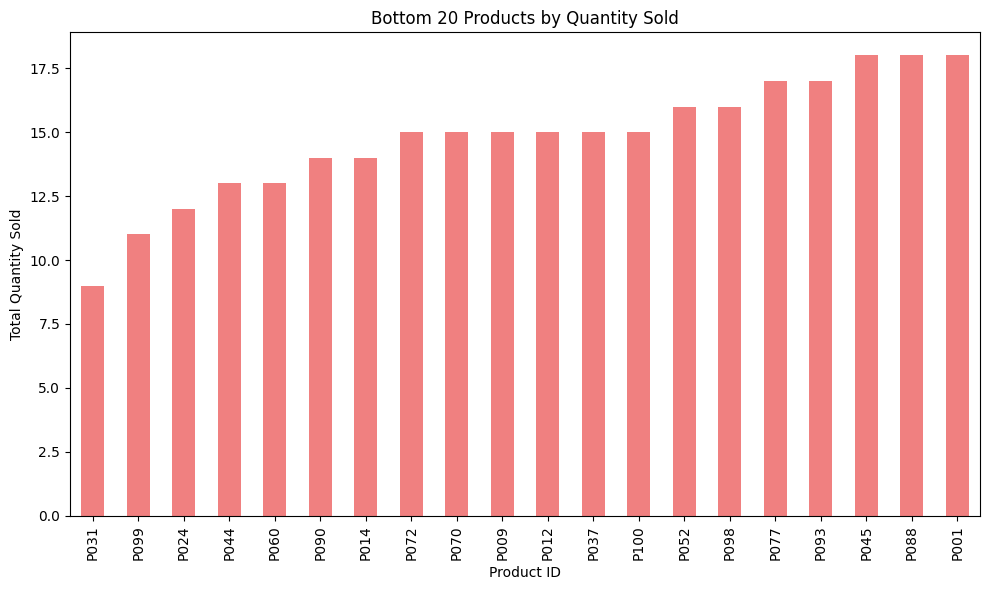

In [ ]:
import matplotlib.pyplot as plt

# Group the transactions by ProductID and calculate the total quantity sold per product
product_quantity = transactions.groupby('ProductID')['Quantity'].sum()

# Sort the products by total quantity sold in ascending order
bottom_20_quantity_products = product_quantity.sort_values(ascending=True).head(20)

# Plotting
plt.figure(figsize=(10,6))
bottom_20_quantity_products.plot(kind='bar', color='lightcoral')
plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the Transactions CSV file
transactions_df = pd.read_csv('Transactions.csv')

# Strip any leading/trailing spaces in column names
transactions_df.columns = transactions_df.columns.str.strip()

# Ensure 'Price' and 'Quantity' are numeric
transactions_df['Price'] = pd.to_numeric(transactions_df['Price'], errors='coerce')
transactions_df['Quantity'] = pd.to_numeric(transactions_df['Quantity'], errors='coerce')

# Calculate total sale amount for each transaction
transactions_df['SaleAmount'] = transactions_df['Quantity'] * transactions_df['Price']

# Group by ProductID and calculate total quantity sold and total sales amount
product_sales = transactions_df.groupby('ProductID').agg(
    TotalQuantitySold=('Quantity', 'sum'),
    TotalSaleAmount=('SaleAmount', 'sum')
).reset_index()

# Sort by quantity sold to get top and bottom 10 products
top_10_products = product_sales.sort_values(by='TotalQuantitySold', ascending=False).head(10)
bottom_10_products = product_sales.sort_values(by='TotalQuantitySold').head(15)

# Calculate total sales amount across all products
total_sales_amount = product_sales['TotalSaleAmount'].sum()

# Calculate the contribution of each product to total sales
top_10_products['ContributionToTotalSales'] = top_10_products['TotalSaleAmount'] / total_sales_amount * 100
bottom_10_products['ContributionToTotalSales'] = bottom_10_products['TotalSaleAmount'] / total_sales_amount * 100

# Output the results
print("Top 10 Products by Quantity Sold and Their Contribution to Total Sales:")
print(top_10_products[['ProductID', 'TotalQuantitySold', 'TotalSaleAmount', 'ContributionToTotalSales']])

print("\nBottom 10 Products by Quantity Sold and Their Contribution to Total Sales:")
print(bottom_10_products[['ProductID', 'TotalQuantitySold', 'TotalSaleAmount', 'ContributionToTotalSales']])


Top 10 Products by Quantity Sold and Their Contribution to Total Sales:
   ProductID  TotalQuantitySold  TotalSaleAmount  ContributionToTotalSales
58      P059                 46         13947.20                  2.021346
53      P054                 46          2635.80                  0.382002
28      P029                 45         19513.80                  2.828105
78      P079                 43         17946.91                  2.601018
60      P061                 43          6749.28                  0.978163
56      P057                 43         10307.10                  1.493792
47      P048                 43         17905.20                  2.594973
61      P062                 39         14592.24                  2.114831
19      P020                 38         15060.92                  2.182756
27      P028                 38          8952.04                  1.297405

Bottom 10 Products by Quantity Sold and Their Contribution to Total Sales:
   ProductID  TotalQuantity

In [ ]:
# prompt: total products sold  in transactions?

# Calculate the total number of products sold across all transactions
total_products_sold = transactions['Quantity'].sum()

print(f"Total products sold in all transactions: {total_products_sold}")

Total products sold in all transactions: 2537


In [ ]:
# prompt: how much percent are least 20 percent product sold compared to total product sold in all transactions

# Calculate the total quantity of the least 20% of products sold
total_products_sold = transactions['Quantity'].sum()
product_quantities = transactions.groupby('ProductID')['Quantity'].sum()
sorted_product_quantities = product_quantities.sort_values()
num_products_20_percent = int(0.20 * len(sorted_product_quantities))
least_20_percent_products_sold = sorted_product_quantities.head(num_products_20_percent).sum()

# Calculate the percentage
percentage = (least_20_percent_products_sold / total_products_sold) * 100

print(f"The least 20% of products represent {percentage:.2f}% of total products sold.")

The least 20% of products represent 11.67% of total products sold.


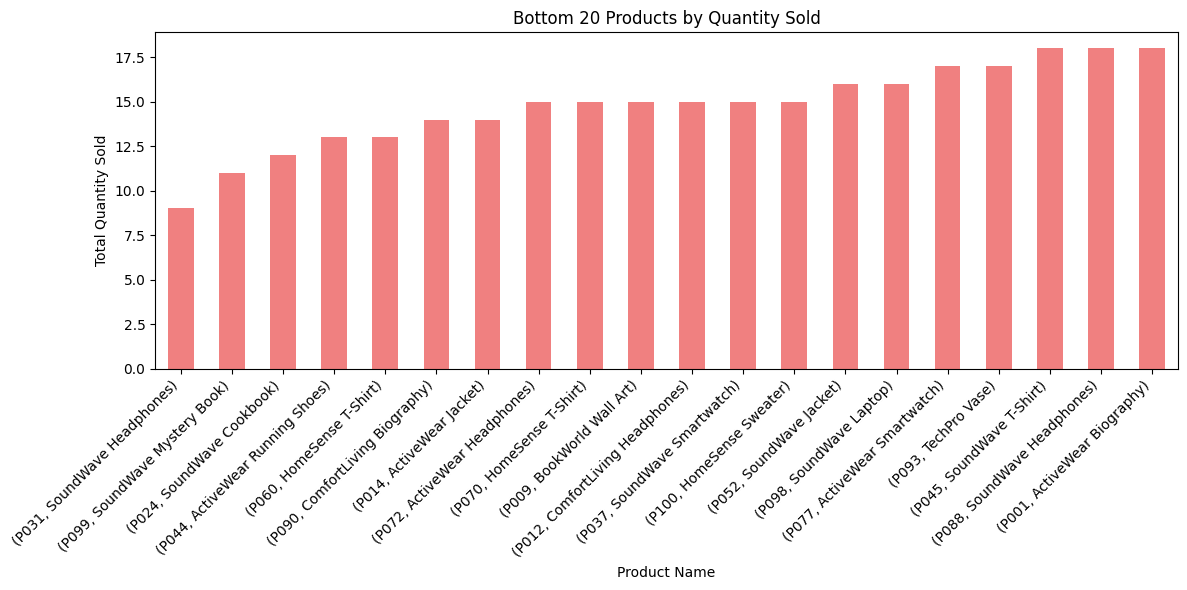

In [ ]:
# Merge transactions with products to get ProductName
merged_data = transactions.merge(products, on='ProductID', how='left')

# Group by ProductID and ProductName to calculate total quantity sold
product_quantity = merged_data.groupby(['ProductID', 'ProductName'])['Quantity'].sum()

# Sort the products by total quantity sold in ascending order and get the bottom 20
bottom_20_quantity_products = product_quantity.sort_values(ascending=True).head(20)

# Plotting
plt.figure(figsize=(12, 6))
bottom_20_quantity_products.plot(kind='bar', color='lightcoral')
plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


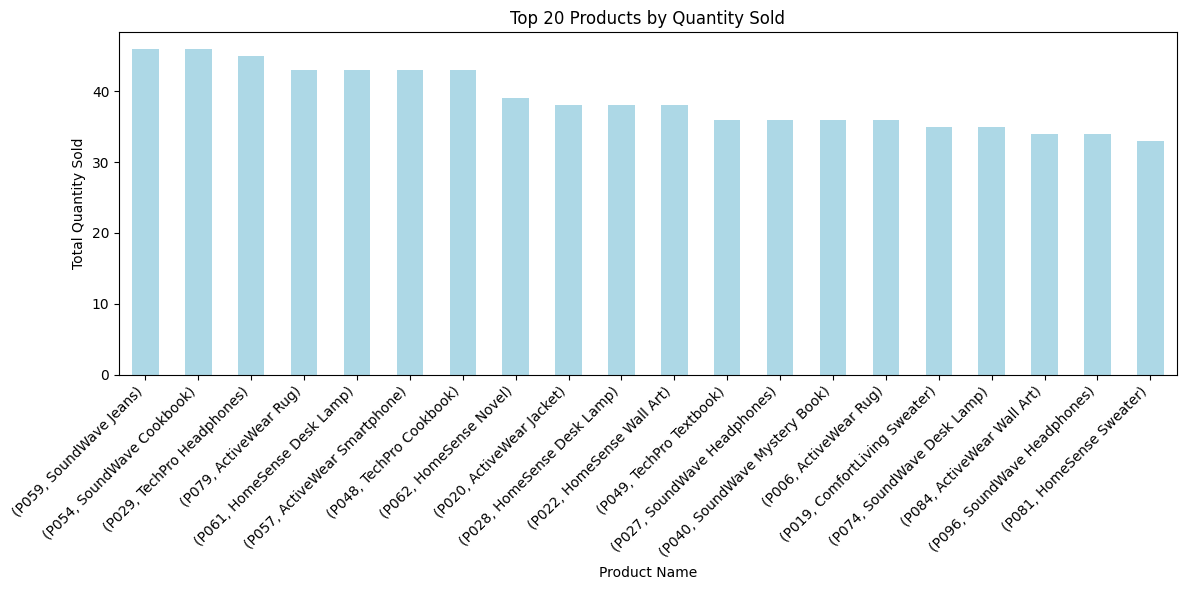

In [ ]:
# Merge transactions with products to get ProductName
merged_data = transactions.merge(products, on='ProductID', how='left')

# Group by ProductID and ProductName to calculate total quantity sold
product_quantity = merged_data.groupby(['ProductID', 'ProductName'])['Quantity'].sum()

# Sort the products by total quantity sold in descending order and get the top 20
top_20_quantity_products = product_quantity.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
top_20_quantity_products.plot(kind='bar', color='lightblue')
plt.title('Top 20 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Find duplicate ProductName entries
duplicate_products = products[products.duplicated(subset=['ProductName'], keep=False)]

# Sort by ProductName for better readability
duplicate_products_sorted = duplicate_products.sort_values(by='ProductName')

# Display the duplicate products
print(duplicate_products_sorted)


   ProductID               ProductName     Category   Price
24      P025   ActiveWear Cookware Set   Home Decor  284.62
22      P023   ActiveWear Cookware Set   Home Decor  454.53
41      P042     ActiveWear Headphones  Electronics  379.44
71      P072     ActiveWear Headphones  Electronics  399.34
13      P014         ActiveWear Jacket     Clothing   26.26
19      P020         ActiveWear Jacket     Clothing  396.34
79      P080         ActiveWear Jacket     Clothing  303.50
5       P006            ActiveWear Rug   Home Decor  121.32
78      P079            ActiveWear Rug   Home Decor  417.37
15      P016  ActiveWear Running Shoes     Clothing  330.05
43      P044  ActiveWear Running Shoes     Clothing   18.82
76      P077     ActiveWear Smartwatch  Electronics  265.51
82      P083     ActiveWear Smartwatch  Electronics  455.72
49      P050     ActiveWear Smartwatch  Electronics  437.65
1       P002     ActiveWear Smartwatch  Electronics  346.30
16      P017       ActiveWear Textbook  

In [ ]:

# Find duplicate ProductName entries
duplicate_products = products[products.duplicated(subset=['ProductName'], keep=False)]

# Count total duplicated products
total_duplicated_products = len(duplicate_products)

# Count unique products among the duplicated ones
unique_duplicated_products = duplicate_products['ProductName'].nunique()

print(f"Total duplicated products: {total_duplicated_products}")
print(f"Number of unique products among duplicated ones: {unique_duplicated_products}")

Total duplicated products: 59
Number of unique products among duplicated ones: 25


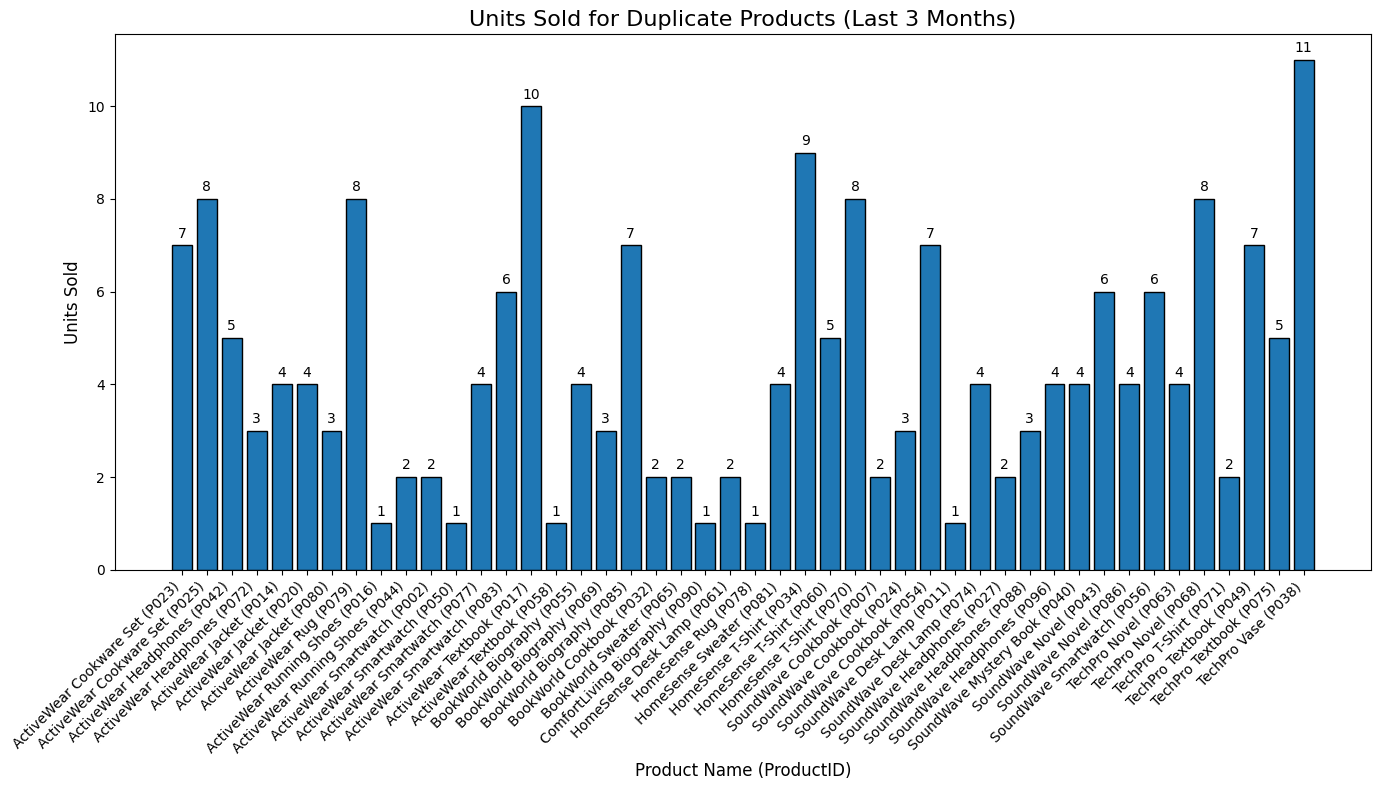

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Filter transactions for the last 3 months
three_months_ago = datetime.now() - timedelta(days=90)
recent_transactions = transactions[transactions['TransactionDate'] >= three_months_ago]

# Merge recent transactions with duplicate products to get quantities sold
recent_duplicates = recent_transactions.merge(duplicate_products, on='ProductID')

# Group by ProductName and ProductID to calculate total quantities sold
recent_product_sales = recent_duplicates.groupby(['ProductName', 'ProductID'])['Quantity'].sum().reset_index()

# Sort by ProductName and ProductID to ensure grouping of products with the same name
recent_product_sales_sorted = recent_product_sales.sort_values(by=['ProductName', 'ProductID'])

# Create labels combining ProductName and ProductID for clarity
recent_product_sales_sorted['Label'] = (
    recent_product_sales_sorted['ProductName'] + " (" + recent_product_sales_sorted['ProductID'] + ")"
)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(
    recent_product_sales_sorted['Label'],
    recent_product_sales_sorted['Quantity'],
    edgecolor='black',
)

# Add quantity values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-position (middle of the bar)
        height + 0.1,  # Y-position (slightly above the bar)
        f'{height:.0f}',  # The value of quantity
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size for the value
        color='black'  # Color of the text
    )

# Customize the plot
plt.title("Units Sold for Duplicate Products (Last 3 Months)", fontsize=16)
plt.xlabel("Product Name (ProductID)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Step 1: Calculate the total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Step 2: Merge the customer spending data with the products DataFrame to get the categories
merged_data = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Step 3: Get the total spending per customer along with their category
customer_category_spending = merged_data.groupby(['CustomerID', 'Category'])['TotalValue'].sum().reset_index()

# Step 4: Find the total spending per customer (for ranking)
customer_total_spending = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)

# Step 5: Merge customer spending with category spending
top_customers_with_category = customer_category_spending[customer_category_spending['CustomerID'].isin(customer_total_spending['CustomerID'])]

# Step 6: Display the top 10 customers and their spending categories
print(top_customers_with_category)


    CustomerID     Category  TotalValue
74       C0028        Books     2371.53
75       C0028     Clothing     1517.50
76       C0028  Electronics     2223.80
77       C0028   Home Decor      706.74
152      C0054        Books     1213.20
153      C0054     Clothing     2802.60
154      C0054  Electronics     2173.42
155      C0054   Home Decor     1851.17
168      C0059        Books      447.23
169      C0059     Clothing     1541.48
170      C0059  Electronics     1687.05
171      C0059   Home Decor     3397.52
181      C0065        Books     3743.70
182      C0065  Electronics     1734.56
183      C0065   Home Decor     2185.44
223      C0082        Books     4309.99
224      C0082     Clothing     1806.76
225      C0082  Electronics      867.28
226      C0082   Home Decor      588.88
272      C0099        Books     2914.60
273      C0099     Clothing     3736.80
274      C0099  Electronics       64.32
390      C0141        Books     3162.24
391      C0141     Clothing     4037.15


In [ ]:
# Step 1: Calculate the total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Step 2: Merge the customer spending data with the products DataFrame to get the categories
merged_data = transactions.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Step 3: Get the total spending per customer along with their category
customer_category_spending = merged_data.groupby(['CustomerID', 'Category'])['TotalValue'].sum().reset_index()

# Step 4: Sort customers by total spending and select top 10 highest spending customers
top_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)

# Step 5: Filter the customer_category_spending data to include only top 10 customers
top_customers_categories = customer_category_spending[customer_category_spending['CustomerID'].isin(top_customers['CustomerID'])]

# Step 6: Display the top 10 customers with their categories and total spending in each category
print(top_customers_categories)


    CustomerID     Category  TotalValue
74       C0028        Books     2371.53
75       C0028     Clothing     1517.50
76       C0028  Electronics     2223.80
77       C0028   Home Decor      706.74
152      C0054        Books     1213.20
153      C0054     Clothing     2802.60
154      C0054  Electronics     2173.42
155      C0054   Home Decor     1851.17
168      C0059        Books      447.23
169      C0059     Clothing     1541.48
170      C0059  Electronics     1687.05
171      C0059   Home Decor     3397.52
181      C0065        Books     3743.70
182      C0065  Electronics     1734.56
183      C0065   Home Decor     2185.44
223      C0082        Books     4309.99
224      C0082     Clothing     1806.76
225      C0082  Electronics      867.28
226      C0082   Home Decor      588.88
272      C0099        Books     2914.60
273      C0099     Clothing     3736.80
274      C0099  Electronics       64.32
390      C0141        Books     3162.24
391      C0141     Clothing     4037.15


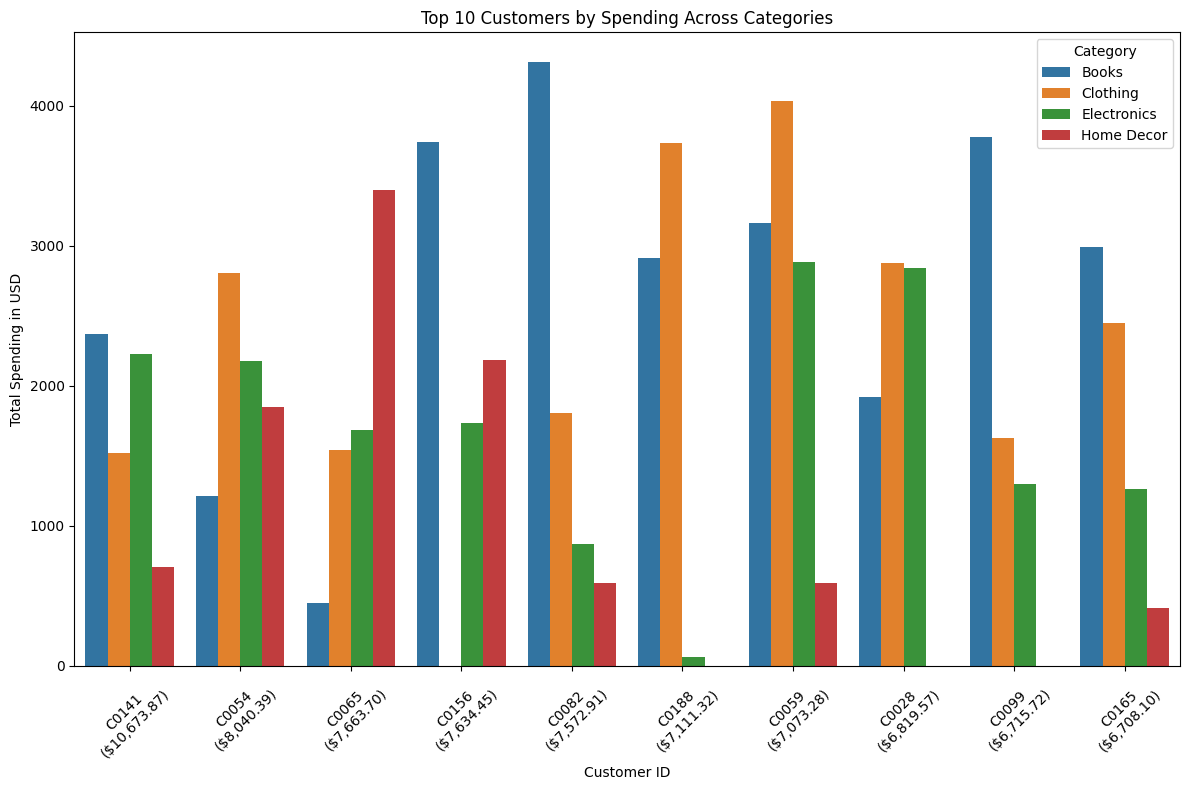

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 6: Plotting the data

# Set figure size for better readability
plt.figure(figsize=(12, 8))

# Use seaborn's barplot to visualize total spending by CustomerID and Category
sns.barplot(x='CustomerID', y='TotalValue', hue='Category', data=top_customers_categories)

# Set the title and labels
plt.title('Top 10 Customers by Spending Across Categories')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending in USD')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add total spending next to each CustomerID on the x-axis
total_spending_dict = top_customers.set_index('CustomerID')['TotalValue'].to_dict()
new_labels = [f'{customer}\n(${total_spending_dict[customer]:,.2f})' for customer in top_customers['CustomerID']]
plt.xticks(ticks=range(len(top_customers)), labels=new_labels)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Step 1: Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 2: Merge the necessary data
merged_data = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
merged_data = merged_data.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Step 3: Group by Region and Category and calculate the required metrics
region_category_spending = merged_data.groupby(['Region', 'Category'])['TotalValue'].agg(
    ['min', 'max', 'median']).reset_index()

# Step 4: Display the table
print("Region-wise Spending (Min, Max, Median) per Category:")
print(region_category_spending)


Region-wise Spending (Min, Max, Median) per Category:
           Region     Category    min      max  median
0            Asia        Books  33.59  1762.80  416.35
1            Asia     Clothing  61.18  1809.68  855.22
2            Asia  Electronics  53.98  1750.60  479.40
3            Asia   Home Decor  55.99  1818.12  556.56
4          Europe        Books  44.12  1879.08  549.85
5          Europe     Clothing  30.59  1927.12  745.10
6          Europe  Electronics  26.99  1825.12  614.94
7          Europe   Home Decor  55.99  1818.12  470.88
8   North America        Books  88.24  1954.52  447.23
9   North America     Clothing  66.32  1585.36  478.89
10  North America  Electronics  16.08  1839.44  709.68
11  North America   Home Decor  41.18  1351.64  412.62
12  South America        Books  33.59  1991.04  621.62
13  South America     Clothing  30.59  1809.68  481.78
14  South America  Electronics  16.08  1825.12  687.18
15  South America   Home Decor  41.18  1789.36  599.38


In [ ]:
import pandas as pd

# Step 1: Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 2: Merge the necessary data
merged_data = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
merged_data = merged_data.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Step 3: Group by Category and Region and calculate the required metrics
region_category_spending = merged_data.groupby(['Category', 'Region'])['TotalValue'].agg(
    ['min', 'max', 'median']).reset_index()

# Step 4: Display the table
print("Category and Region-wise Spending (Min, Max, Median):")
print(region_category_spending)


Category and Region-wise Spending (Min, Max, Median):
       Category         Region    min      max  median
0         Books           Asia  33.59  1762.80  416.35
1         Books         Europe  44.12  1879.08  549.85
2         Books  North America  88.24  1954.52  447.23
3         Books  South America  33.59  1991.04  621.62
4      Clothing           Asia  61.18  1809.68  855.22
5      Clothing         Europe  30.59  1927.12  745.10
6      Clothing  North America  66.32  1585.36  478.89
7      Clothing  South America  30.59  1809.68  481.78
8   Electronics           Asia  53.98  1750.60  479.40
9   Electronics         Europe  26.99  1825.12  614.94
10  Electronics  North America  16.08  1839.44  709.68
11  Electronics  South America  16.08  1825.12  687.18
12   Home Decor           Asia  55.99  1818.12  556.56
13   Home Decor         Europe  55.99  1818.12  470.88
14   Home Decor  North America  41.18  1351.64  412.62
15   Home Decor  South America  41.18  1789.36  599.38


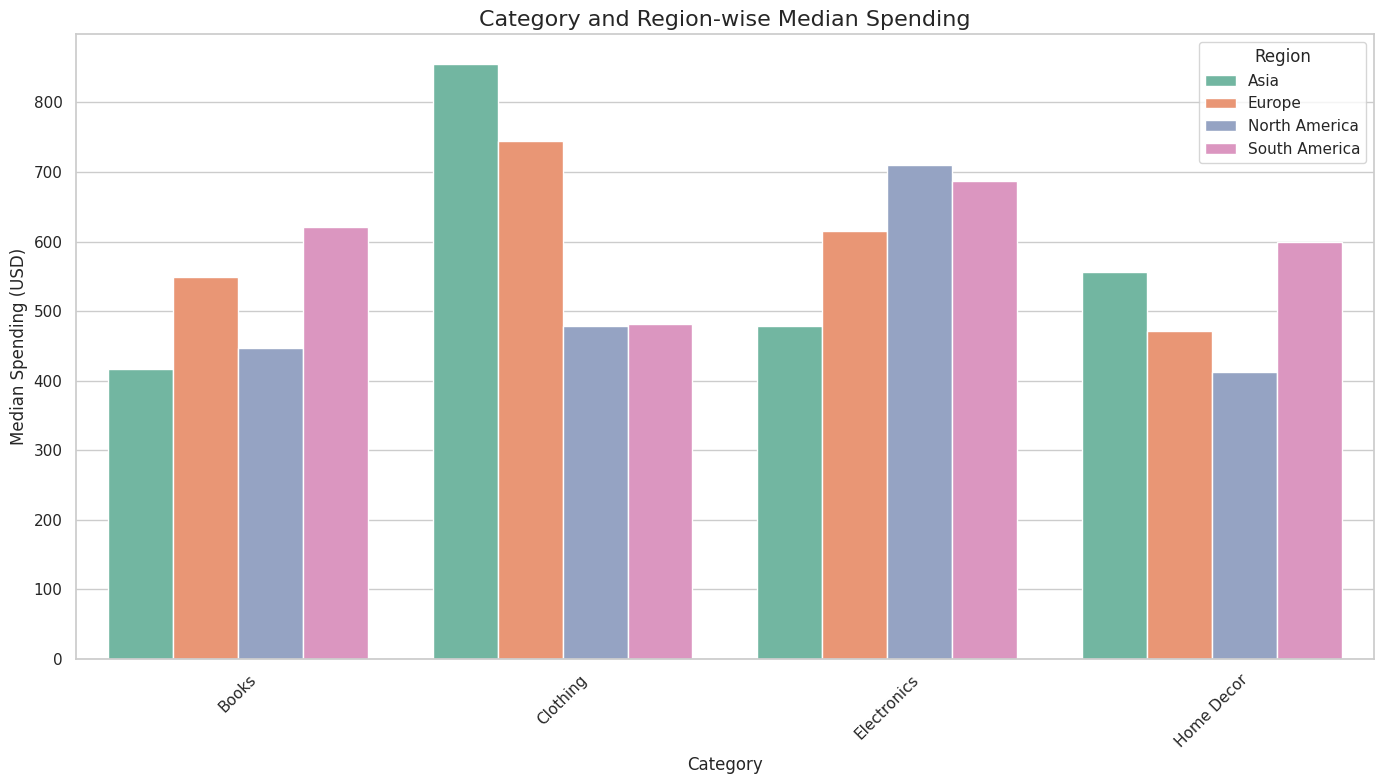

In [ ]:
# Plotting the Category and Median Spending, Grouped by Category
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='median', hue='Region', data=region_category_spending, palette="Set2")
plt.title('Category and Region-wise Median Spending', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Median Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming you have merged_data already loaded with required columns

# Step 1: Convert TransactionDate to datetime format
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# Step 2: Extract Year-Month from TransactionDate
merged_data['Year-Month'] = merged_data['TransactionDate'].dt.to_period('M')

# Step 3: Group by Year-Month and Category, then sum the TotalValue
monthly_category_spending = merged_data.groupby(['Year-Month', 'Category'])['TotalValue'].sum().reset_index()

# Step 4: Sort values by Year-Month and TotalValue in descending order
monthly_category_spending_sorted = monthly_category_spending.sort_values(['Year-Month', 'TotalValue'], ascending=[True, False])

# Step 5: Get top 2 categories for each month
top_2_categories_per_month = monthly_category_spending_sorted.groupby('Year-Month').head(2)

# Display the result
print(top_2_categories_per_month)


   Year-Month     Category  TotalValue
1     2023-12  Electronics     1870.24
0     2023-12     Clothing     1585.36
4     2024-01     Clothing    17984.46
3     2024-01        Books    17515.05
7     2024-02        Books    21073.17
10    2024-02   Home Decor    13737.85
14    2024-03   Home Decor    15833.77
13    2024-03  Electronics    15383.29
17    2024-04  Electronics    18390.58
16    2024-04     Clothing    14454.24
19    2024-05        Books    21793.32
20    2024-05     Clothing    17236.32
23    2024-06        Books    16270.05
24    2024-06     Clothing    13217.41
29    2024-07  Electronics    22096.51
27    2024-07        Books    18501.32
31    2024-08        Books    18778.53
33    2024-08  Electronics    18214.34
37    2024-09  Electronics    21703.48
36    2024-09     Clothing    18906.19
39    2024-10        Books    13438.32
41    2024-10  Electronics    12781.45
44    2024-11     Clothing    11983.40
45    2024-11  Electronics    11275.89
47    2024-12        Book

<ipython-input-136-0dde5645c860>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_categories_per_month['Year-Month'] = pd.to_datetime(top_2_categories_per_month['Year-Month'].astype(str))


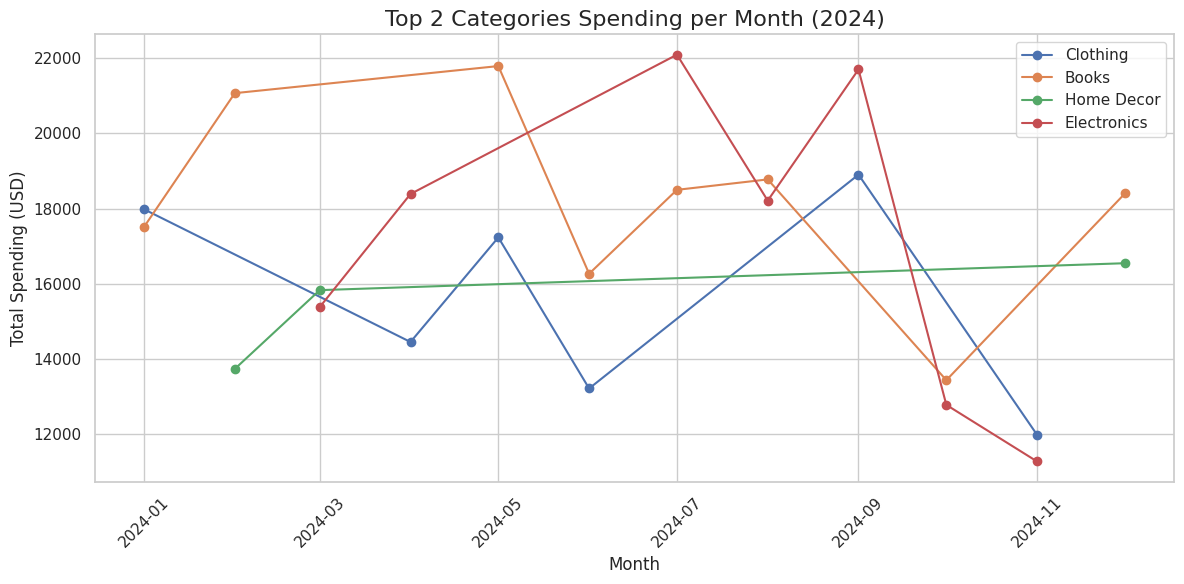

In [ ]:


import matplotlib.pyplot as plt

# Assuming top_2_categories_per_month DataFrame is already created as in your code

# Convert 'Year-Month' to datetime objects for plotting
top_2_categories_per_month['Year-Month'] = pd.to_datetime(top_2_categories_per_month['Year-Month'].astype(str))

# Filter data for 2024
top_2_categories_2024 = top_2_categories_per_month[top_2_categories_per_month['Year-Month'].dt.year == 2024]

plt.figure(figsize=(12, 6))

for category in top_2_categories_2024['Category'].unique():
    category_data = top_2_categories_2024[top_2_categories_2024['Category'] == category]
    plt.plot(category_data['Year-Month'], category_data['TotalValue'], label=category, marker='o')

plt.title('Top 2 Categories Spending per Month (2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with products to get product details (like Category and Price)
merged_data = pd.merge(transactions, products, on='ProductID', how='left')

# Merge the resulting data with customers to get customer details
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='left')

# Calculate the total spending for each customer (i.e., sum of TotalValue)
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Sort customers by TotalValue in descending order and find the top 25% spenders
top_25_percent_spenders = customer_spending.sort_values('TotalValue', ascending=False).head(int(len(customer_spending) * 0.25))

# Calculate the total revenue (sum of TotalValue for all customers)
total_revenue = customer_spending['TotalValue'].sum()

# Calculate the revenue contributed by the top 25% spenders
top_25_percent_revenue = top_25_percent_spenders['TotalValue'].sum()

# Calculate the percentage contribution of the top 25% spenders to the total revenue
percentage_contribution = (top_25_percent_revenue / total_revenue) * 100

# Print the results
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Revenue from Top 25% Spenders: ${top_25_percent_revenue:.2f}")
print(f"Percentage of Total Revenue from Top 25% Spenders: {percentage_contribution:.2f}%")


Total Revenue: $689995.56
Revenue from Top 25% Spenders: $291792.20
Percentage of Total Revenue from Top 25% Spenders: 42.29%


In [ ]:
import pandas as pd

# Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with products to get product details (like Category and Price)
merged_data = pd.merge(transactions, products, on='ProductID', how='left')

# Merge the resulting data with customers to get customer details
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='left')

# Step 1: Count the number of transactions per customer
transaction_count = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_count.columns = ['CustomerID', 'TransactionCount']

# Step 2: Sort customers by the number of transactions in descending order and get the top 25
top_25_by_transactions = transaction_count.sort_values('TransactionCount', ascending=False).head(25)

# Step 3: Merge with the original data to calculate the total value for these top 25 customers
top_25_data = merged_data[merged_data['CustomerID'].isin(top_25_by_transactions['CustomerID'])]

# Step 4: Calculate the total revenue for each of the top 25 customers
top_25_revenue = top_25_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Step 5: Calculate the total revenue of all customers
total_revenue = merged_data['TotalValue'].sum()

# Step 6: Calculate the total revenue from the top 25 customers
top_25_total_revenue = top_25_revenue['TotalValue'].sum()

# Step 7: Calculate the percentage contribution of the top 25 customers to the total revenue
percentage_contribution = (top_25_total_revenue / total_revenue) * 100

# Output the results
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Revenue from Top 25 Customers (by number of Transactions): ${top_25_total_revenue:.2f}")
print(f"Percentage of Total Revenue from Top 25 Customers: {percentage_contribution:.2f}%")


Total Revenue: $689995.56
Revenue from Top 25 Customers (by Transactions): $140846.00
Percentage of Total Revenue from Top 25 Customers: 20.41%


In [ ]:
import pandas as pd

# Load the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 1: Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 2: Get the most recent transaction date for each customer
last_transaction_date = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_transaction_date.columns = ['CustomerID', 'LastTransactionDate']

# Step 3: Merge the last transaction date with the customer data
customer_data = pd.merge(customers, last_transaction_date, on='CustomerID', how='left')

# Step 4: Define a threshold date (before 31st June 2024)
threshold_date = pd.to_datetime('2024-06-30')

# Step 5: Identify customers who haven't made a transaction since the threshold date
lost_customers = customer_data[customer_data['LastTransactionDate'] < threshold_date]

# Step 6: Output the lost customers
print(f"Total lost customers before 31/06/2024: {lost_customers.shape[0]}")
print(lost_customers[['CustomerID', 'CustomerName', 'LastTransactionDate']])


Total lost customers before 31/06/2024: 13
    CustomerID       CustomerName LastTransactionDate
13       C0014     Deborah Wilcox 2024-01-17 18:31:55
19       C0020  Mr. Manuel Conway 2024-01-30 00:57:29
57       C0058     Zachary Turner 2024-02-01 14:24:48
72       C0073      Heidi Johnson 2024-03-20 02:37:13
79       C0080     David Gonzalez 2024-03-12 15:48:24
96       C0097          Tina Ford 2024-03-23 05:58:54
109      C0110    Elizabeth Wells 2024-01-02 19:11:34
127      C0128        Henry Leach 2024-05-26 08:08:36
129      C0130       Robert Jones 2024-05-14 23:14:59
143      C0144        Andrea Hart 2024-04-27 20:02:17
149      C0150    Angela Williams 2024-05-25 17:44:48
181      C0182     Joshua Preston 2024-05-09 17:32:28
192      C0193     Douglas Torres 2024-05-27 09:32:58


In [ ]:
import pandas as pd

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Step 1: Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 2: Find the first transaction date for each customer
first_transaction_date = transactions.groupby('CustomerID')['TransactionDate'].min().reset_index()

# Step 3: Filter customers who made their first transaction after 31/06/2024
cutoff_date = pd.to_datetime('2024-06-30')  # 31/06/2024 is not a valid date, assuming it's June 30th
new_customers = first_transaction_date[first_transaction_date['TransactionDate'] > cutoff_date]

# Step 4: List the CustomerIDs of these customers
new_customer_ids = new_customers['CustomerID'].tolist()

# Optionally, you can merge this with customer details to get names or other info
customers = pd.read_csv('Customers.csv')
new_customers_details = customers[customers['CustomerID'].isin(new_customer_ids)]

# Display the new customers who didn't make a transaction before 31/06/2024
print(new_customers_details)


    CustomerID     CustomerName         Region  SignupDate
15       C0016      Emily Woods  North America  2024-01-03
32       C0033       Tyler Holt  North America  2024-08-04
59       C0060     James Murphy         Europe  2022-04-22
77       C0078     Julia Palmer           Asia  2024-11-13
81       C0082     Aimee Taylor  South America  2022-05-13
122      C0123   Jason Johnston           Asia  2023-11-05
131      C0132     Lisa Jackson         Europe  2023-02-01
139      C0140  Gregory Estrada           Asia  2023-07-01
150      C0151   Amber Gonzalez  South America  2024-11-22
152      C0153     Justin Smith  South America  2022-03-20
165      C0166      John Rogers         Europe  2022-02-13
195      C0196      Laura Watts         Europe  2022-06-07
197      C0198      Rebecca Ray         Europe  2022-02-27
198      C0199   Andrea Jenkins         Europe  2022-12-03


In [ ]:
import pandas as pd

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Step 1: Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Step 2: Sort the transactions by CustomerID and TransactionDate
transactions = transactions.sort_values(by=['CustomerID', 'TransactionDate'])

# Step 3: Calculate the difference between consecutive transaction dates
transactions['PreviousTransactionDate'] = transactions.groupby('CustomerID')['TransactionDate'].shift(1)
transactions['TransactionDiff'] = (transactions['TransactionDate'] - transactions['PreviousTransactionDate']).dt.days

# Step 4: Filter customers who have no gap larger than 60 days between any consecutive transactions
loyal_customers = transactions.groupby('CustomerID').filter(lambda x: all(x['TransactionDiff'].dropna() <= 60))

# Step 5: Get unique loyal customers
loyal_customers_ids = loyal_customers['CustomerID'].unique()

# Optionally, merge with Customer data to get names or more details
customers = pd.read_csv('Customers.csv')
loyal_customers_details = customers[customers['CustomerID'].isin(loyal_customers_ids)]

# Display loyal customers
print(loyal_customers_details)


    CustomerID       CustomerName         Region  SignupDate
13       C0014     Deborah Wilcox         Europe  2024-06-22
19       C0020  Mr. Manuel Conway  North America  2024-06-11
32       C0033         Tyler Holt  North America  2024-08-04
57       C0058     Zachary Turner  North America  2024-01-28
59       C0060       James Murphy         Europe  2022-04-22
72       C0073      Heidi Johnson         Europe  2022-08-20
77       C0078       Julia Palmer           Asia  2024-11-13
79       C0080     David Gonzalez           Asia  2024-02-07
81       C0082       Aimee Taylor  South America  2022-05-13
90       C0091          Lisa Kirk  South America  2023-03-16
96       C0097          Tina Ford           Asia  2023-12-18
109      C0110    Elizabeth Wells           Asia  2024-09-21
111      C0112       Brian Adkins  South America  2022-07-07
129      C0130       Robert Jones  South America  2023-04-19
131      C0132       Lisa Jackson         Europe  2023-02-01
143      C0144        An

<ipython-input-112-f8b41ff350eb>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_time_diff['TimeDifference'].fillna(0, inplace=True)


    CustomerID  TimeDifference
0        C0001       71.750000
1        C0002       92.333333
2        C0003       62.333333
3        C0004       42.142857
4        C0005      116.500000
..         ...             ...
194      C0196       43.000000
195      C0197      174.500000
196      C0198        5.000000
197      C0199       22.666667
198      C0200       56.250000

[199 rows x 2 columns]


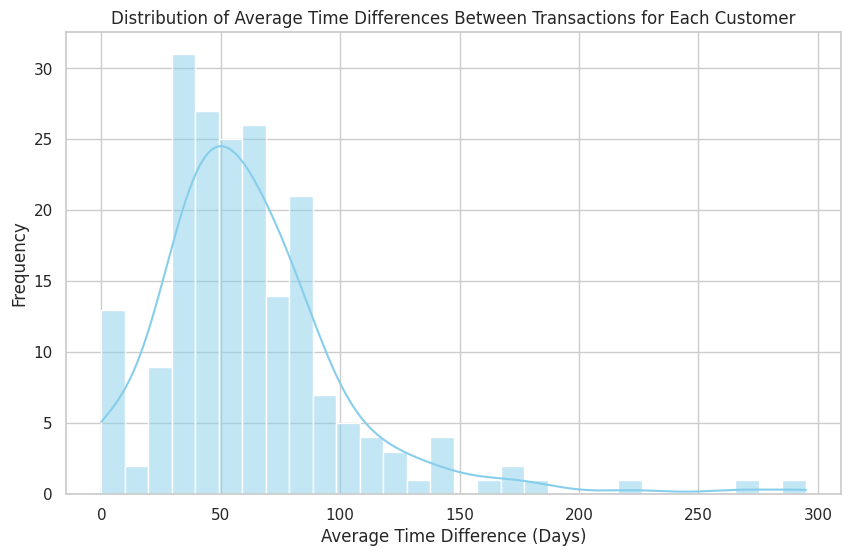

In [ ]:
import pandas as pd

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Sort transactions by CustomerID and TransactionDate
transactions = transactions.sort_values(by=['CustomerID', 'TransactionDate'])

# Calculate the time difference between consecutive transactions for each customer
transactions['TimeDifference'] = transactions.groupby('CustomerID')['TransactionDate'].diff().dt.days

# For customers with only one transaction, we can assign a NaN or 0 value (we'll choose NaN)
# We'll calculate the average time difference for each customer
avg_time_diff = transactions.groupby('CustomerID')['TimeDifference'].mean().reset_index()

# If you want to replace NaN values with 0 (for customers with a single transaction):
avg_time_diff['TimeDifference'].fillna(0, inplace=True)

# Now we have the average time difference between transactions for each customer
# Display the result
print(avg_time_diff)

# You can also plot the distribution of average time differences
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(avg_time_diff['TimeDifference'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Time Differences Between Transactions for Each Customer')
plt.xlabel('Average Time Difference (Days)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-113-458eeb06334d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_time_diff['TimeDifference'].fillna(0, inplace=True)



Average Time Between Transactions for Each Customer:
+-----+------------+--------------------------------+
|     | CustomerID | Average Time Difference (Days) |
+-----+------------+--------------------------------+
|  0  |   C0001    |             71.75              |
|  1  |   C0002    |       92.33333333333333        |
|  2  |   C0003    |       62.333333333333336       |
|  3  |   C0004    |       42.142857142857146       |
|  4  |   C0005    |             116.5              |
|  5  |   C0006    |       84.66666666666667        |
|  6  |   C0007    |              93.0              |
|  7  |   C0008    |       36.111111111111114       |
|  8  |   C0009    |             104.5              |
|  9  |   C0010    |              89.0              |
| 10  |   C0011    |             80.25              |
| 11  |   C0012    |       37.333333333333336       |
| 12  |   C0013    |              41.5              |
| 13  |   C0014    |              0.0               |
| 14  |   C0015    |        

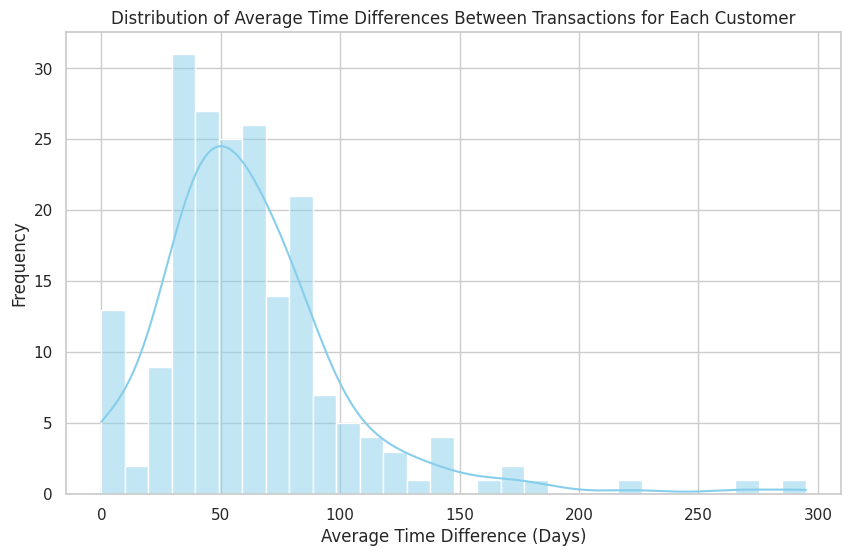

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Sort transactions by CustomerID and TransactionDate
transactions = transactions.sort_values(by=['CustomerID', 'TransactionDate'])

# Calculate the time difference between consecutive transactions for each customer
transactions['TimeDifference'] = transactions.groupby('CustomerID')['TransactionDate'].diff().dt.days

# For customers with only one transaction, we can assign a NaN or 0 value (we'll choose NaN)
# We'll calculate the average time difference for each customer
avg_time_diff = transactions.groupby('CustomerID')['TimeDifference'].mean().reset_index()

# If you want to replace NaN values with 0 (for customers with a single transaction):
avg_time_diff['TimeDifference'].fillna(0, inplace=True)

# Display the result in a table format
print("\nAverage Time Between Transactions for Each Customer:")
print(tabulate(avg_time_diff, headers=['CustomerID', 'Average Time Difference (Days)'], tablefmt='pretty'))

# Plot the distribution of average time differences
plt.figure(figsize=(10, 6))
sns.histplot(avg_time_diff['TimeDifference'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Time Differences Between Transactions for Each Customer')
plt.xlabel('Average Time Difference (Days)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-140-264f9a325c92>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_time_diff['TimeDifference'].fillna(0, inplace=True)



Average Time Between Transactions for Each Customer:

Number of customers who make a transaction within 90 days: 169
Total number of customers: 199
Percentage of customers who make a transaction within 90 days: 84.92%


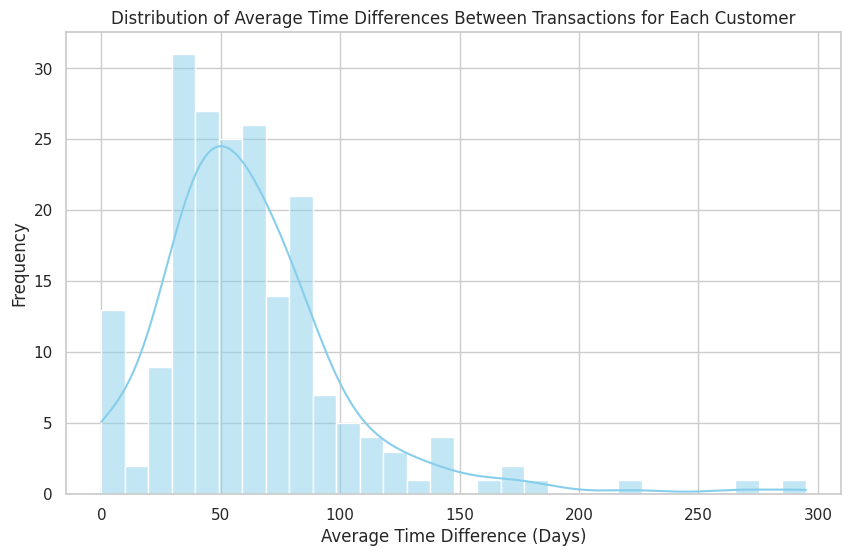


Average Time Between Transactions for Each Customer:

Number of customers who make a transaction within 120 days: 185
Total number of customers: 199
Percentage of customers who make a transaction within 120 days: 92.96%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Convert 'TransactionDate' to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Sort transactions by CustomerID and TransactionDate
transactions = transactions.sort_values(by=['CustomerID', 'TransactionDate'])

# Calculate the time difference between consecutive transactions for each customer
transactions['TimeDifference'] = transactions.groupby('CustomerID')['TransactionDate'].diff().dt.days

# For customers with only one transaction, we can assign a NaN or 0 value (we'll choose NaN)
# Calculate the average time difference for each customer
avg_time_diff = transactions.groupby('CustomerID')['TimeDifference'].mean().reset_index()

# If you want to replace NaN values with 0 (for customers with a single transaction):
avg_time_diff['TimeDifference'].fillna(0, inplace=True)

# Define YY days (the threshold for making another transaction)
YY = 90  # You can adjust this value as needed

# Calculate the percentage of customers who have an average time difference <= YY days
customers_with_frequent_transactions = avg_time_diff[avg_time_diff['TimeDifference'] <= YY]
percentage_frequent_customers = (len(customers_with_frequent_transactions) / len(avg_time_diff)) * 100

# Display the result in a table format
print("\nAverage Time Between Transactions for Each Customer:")
# print(tabulate(avg_time_diff, headers=['CustomerID', 'Average Time Difference (Days)'], tablefmt='pretty'))

# Print the number of customers and percentage of customers with frequent transactions
print(f"\nNumber of customers who make a transaction within {YY} days: {len(customers_with_frequent_transactions)}")
print(f"Total number of customers: {len(avg_time_diff)}")
print(f"Percentage of customers who make a transaction within {YY} days: {percentage_frequent_customers:.2f}%")

# Plot the distribution of average time differences
plt.figure(figsize=(10, 6))
sns.histplot(avg_time_diff['TimeDifference'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Time Differences Between Transactions for Each Customer')
plt.xlabel('Average Time Difference (Days)')
plt.ylabel('Frequency')
plt.show()

# Define YY days (the threshold for making another transaction)
YY = 120  # You can adjust this value as needed

# Calculate the percentage of customers who have an average time difference <= YY days
customers_with_frequent_transactions = avg_time_diff[avg_time_diff['TimeDifference'] <= YY]
percentage_frequent_customers = (len(customers_with_frequent_transactions) / len(avg_time_diff)) * 100

# Display the result in a table format
print("\nAverage Time Between Transactions for Each Customer:")
# print(tabulate(avg_time_diff, headers=['CustomerID', 'Average Time Difference (Days)'], tablefmt='pretty'))

# Print the number of customers and percentage of customers with frequent transactions
print(f"\nNumber of customers who make a transaction within {YY} days: {len(customers_with_frequent_transactions)}")
print(f"Total number of customers: {len(avg_time_diff)}")
print(f"Percentage of customers who make a transaction within {YY} days: {percentage_frequent_customers:.2f}%")


In [ ]:
import pandas as pd

# Load the data
transactions = pd.read_csv('Transactions.csv')

# Count the number of transactions for each customer
transaction_counts = transactions['CustomerID'].value_counts()

# Filter customers who made exactly one transaction
single_transaction_customers = transaction_counts[transaction_counts == 1]

# Get the number of such customers
num_single_transaction_customers = single_transaction_customers.shape[0]

# Print the result
print(f"Number of customers who made exactly one transaction: {num_single_transaction_customers}")


Number of customers who made exactly one transaction: 12
